In [1]:
# 1. This allows the notebook to see the 'src' folder
import sys
import os
sys.path.append(os.path.abspath('..'))

# 2. Import your pro scripts
from src.data_loader import load_raw_data
from src.preprocessing import clean_and_feature_engineer

# 3. Load and clean the data
raw_data = load_raw_data()
df = clean_and_feature_engineer(raw_data)

# 4. Show the result
print(f"Success! You have loaded {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Success! You have loaded 2212 rows and 29 columns.


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Is_Parent,TotalSpending
0,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,1,58,0,0,1617
1,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,61,2,1,27
2,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,50,0,0,776
3,Graduate,Partner,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,31,1,1,53
4,Postgrad,Partner,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,34,1,1,422


# Cell 2: Descriptive Statistics

In [2]:
# Check basic statistics for numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Income,2212.0,51958.810579,1730.0,35233.5,51371.0,68487.0,162397.0,21527.278844
Kidhome,2212.0,0.441682,0.0,0.0,0.0,1.0,2.0,0.536955
Teenhome,2212.0,0.505877,0.0,0.0,0.0,1.0,2.0,0.544253
Dt_Customer,2212,2013-07-10 06:51:25.714285824,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 00:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2212.0,49.019439,0.0,24.0,49.0,74.0,99.0,28.943121
MntWines,2212.0,305.287523,0.0,24.0,175.5,505.0,1493.0,337.32294
MntFruits,2212.0,26.329566,0.0,2.0,8.0,33.0,199.0,39.744052
MntMeatProducts,2212.0,167.029837,0.0,16.0,68.0,232.25,1725.0,224.254493
MntFishProducts,2212.0,37.648734,0.0,3.0,12.0,50.0,259.0,54.772033
MntSweetProducts,2212.0,27.046564,0.0,1.0,8.0,33.0,262.0,41.090991


# Cell 3: Univariate Analysis - Distributions

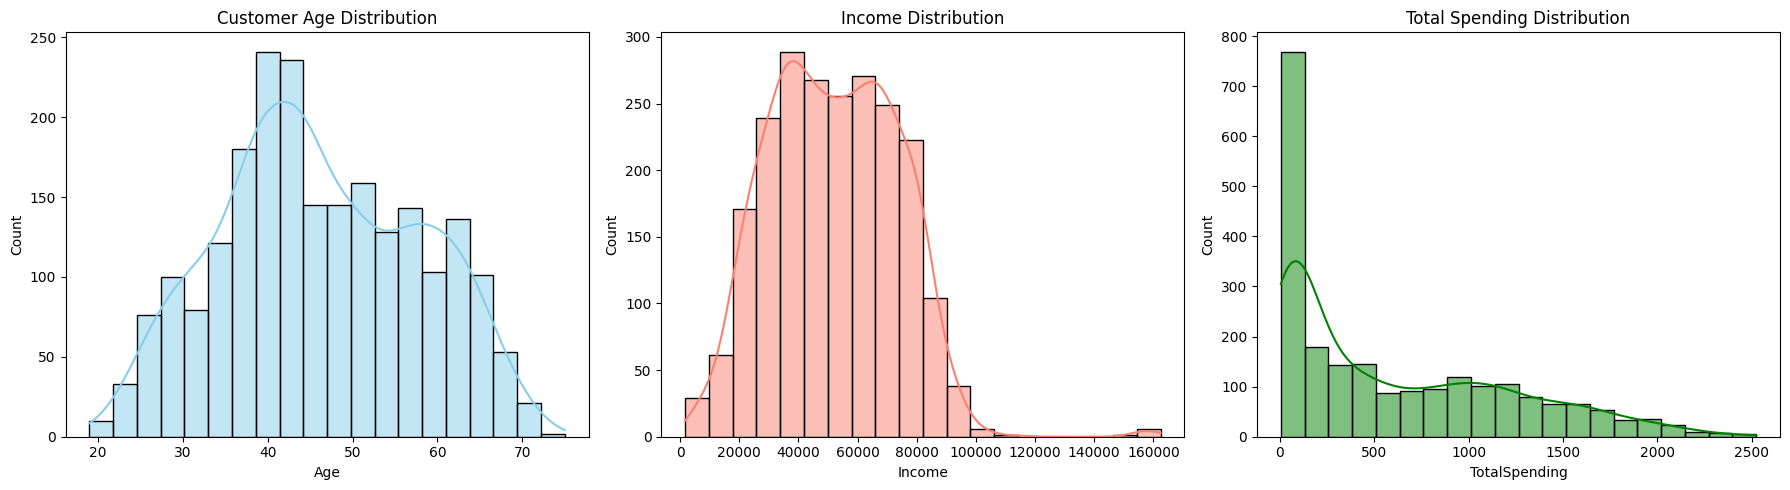

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Age Distribution
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Customer Age Distribution')

# 2. Income Distribution
sns.histplot(df['Income'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Income Distribution')

# 3. Spending Distribution
sns.histplot(df['TotalSpending'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Total Spending Distribution')

plt.tight_layout()
plt.show()

# Cell 4: Categorical Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22556\1167148368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, ax=axes[0], palette='viridis', order=df['Education'].value_counts().index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22556\1167148368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df, ax=axes[1], palette='magma')


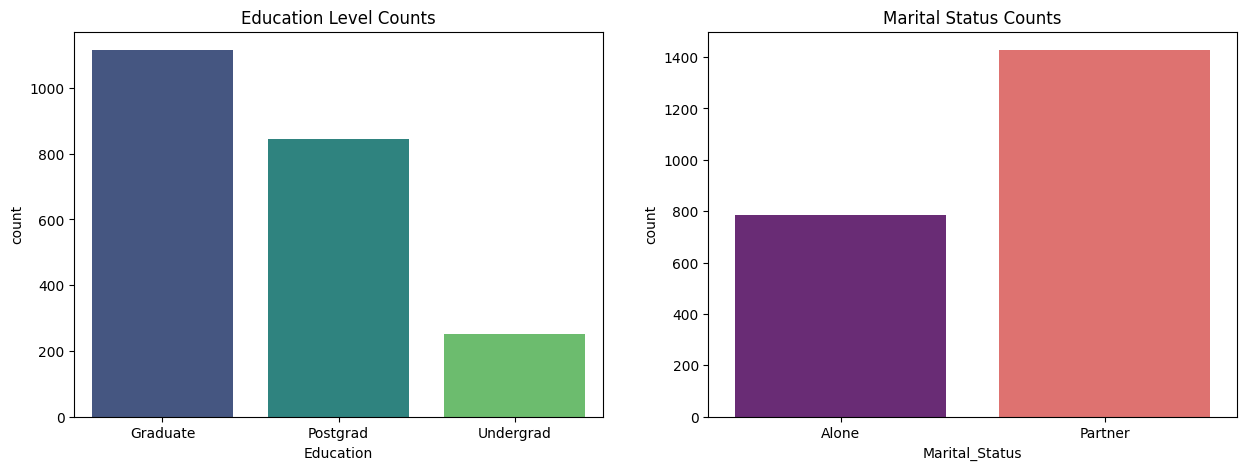

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Education levels
sns.countplot(x='Education', data=df, ax=axes[0], palette='viridis', order=df['Education'].value_counts().index)
axes[0].set_title('Education Level Counts')

# Marital Status
sns.countplot(x='Marital_Status', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Marital Status Counts')

plt.show()

# Cell 5: Bivariate Analysis - Income vs. Spending

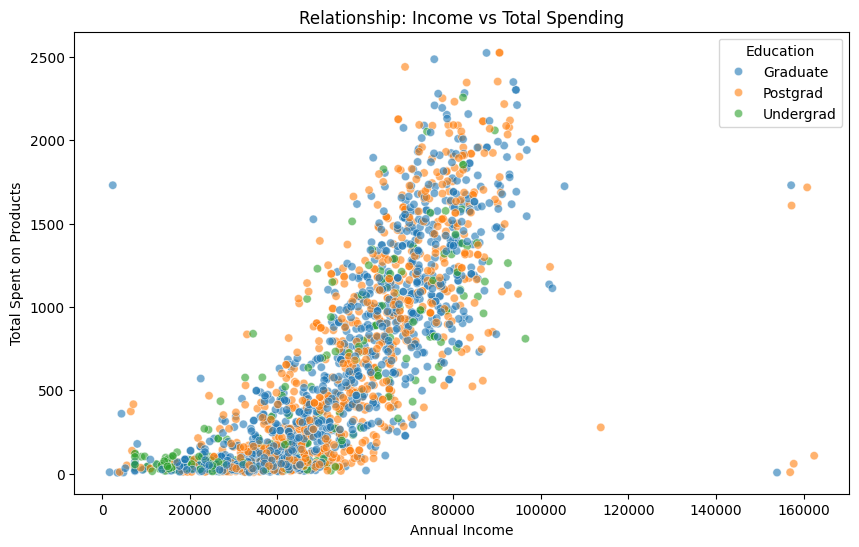

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df, hue='Education', alpha=0.6)
plt.title('Relationship: Income vs Total Spending')
plt.xlabel('Annual Income')
plt.ylabel('Total Spent on Products')
plt.show()

# Cell 6: Campaign Success Rates

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22556\539403468.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rates.index, y=success_rates.values, palette='Blues_d')


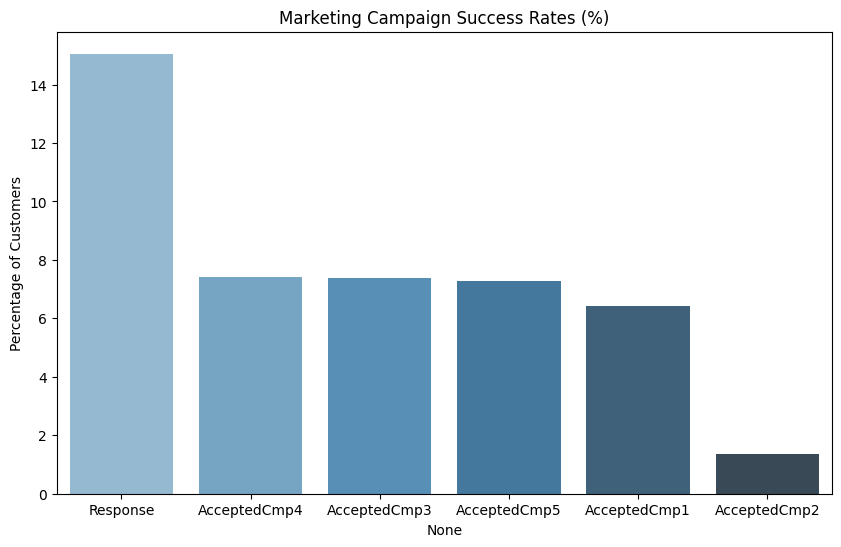

In [6]:
from src.config import CAMPAIGN_COLS

# Calculate the percentage of people who accepted each campaign
success_rates = df[CAMPAIGN_COLS].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=success_rates.index, y=success_rates.values, palette='Blues_d')
plt.title('Marketing Campaign Success Rates (%)')
plt.ylabel('Percentage of Customers')
plt.show()

# Cell 7: Correlation Heatmap

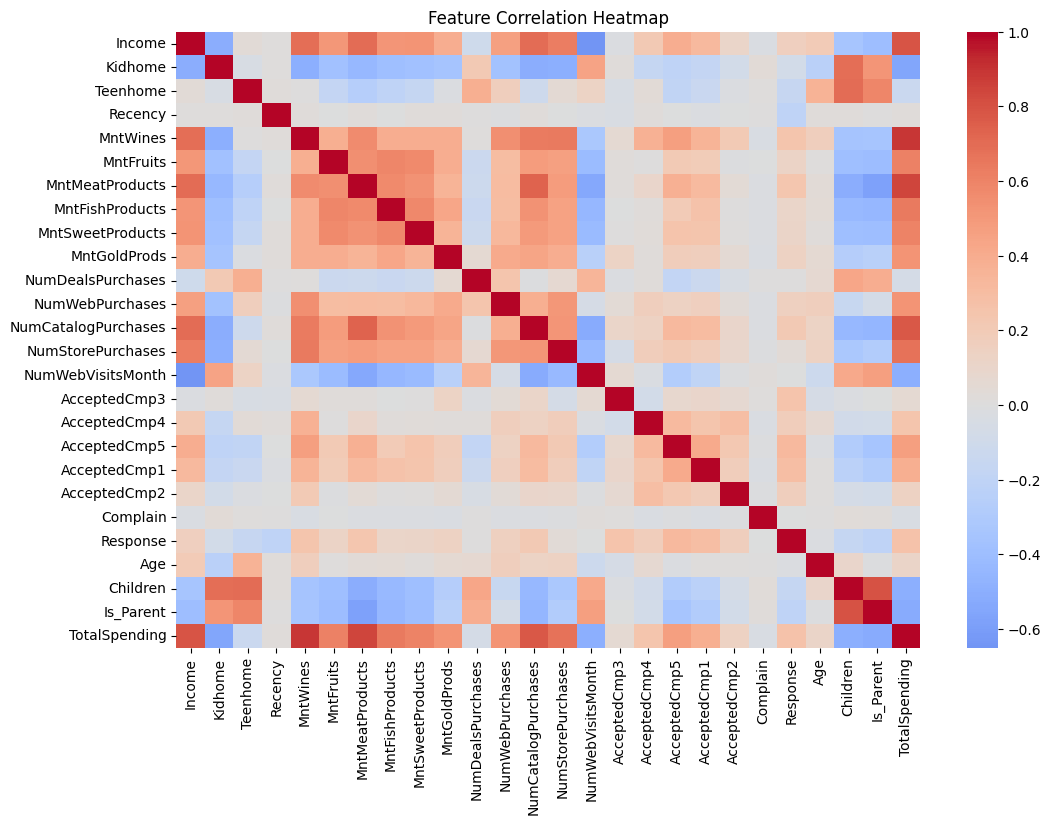

In [7]:
plt.figure(figsize=(12, 8))
# We only correlate numerical columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# Summary : 
1. Target Audience: The data shows our best customers are Graduates with an average age of 45.

2. Behavior: Income is the strongest predictor of spending.

3. Campaigns: The most recent campaign (Response) outperformed all previous ones.

4. Parents: (Try adding a boxplot of Is_Parent vs TotalSpending to see the difference!)